In [243]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import pandas as pd
from tqdm.auto import tqdm
import pickle

from mpldatacursor import datacursor

In [2]:
database = pd.read_pickle('data/full_database.pkl')

In [258]:
class Display():
    def __init__(self, database):
        self.database = database
        self.content = ['habitus', 'epigyne', 'vulve', 'pedipalp', 'other']
        
    def help(self):
        print('Query argument example:')
        print('family == "Agelenidae" & genus == "Urocoras"')
        print('')
        print('Site options:')
        print('both/piwigo/nmbe')
        print('')
        print('Content options:')
        print('all/habitus/epigyne/vulve/pedipalp/other')
        print('')
        
    def get_image_array(self, family, genus, species, query, site, content, one_of_each):
        df = self.database.copy()
        if family is not None:
            df = df[df.family == family]
        if genus is not None:
            df = df[df.genus == genus]
        if species is not None:
            df = df[df.species == species]
        if query is not None:
            df = df.query(query)
        
        piwigo = df.piwigo.values
        nmbe = df.nmbe.values
        family = df.family.values
        species = df.species.values
        
        image_array = []
        name_array = []
        if site == 'piwigo' or site == 'both':
            if content == 'all':
                for data, f, s in zip(piwigo, family, species):
                    for key in self.content:
                        if one_of_each:
                            if data[key]:
                                image_array.append(np.random.choice(data[key]))
                                name_array.append(f'{f} {s}')
                        else:
                            image_array.extend(data[key])
                            name_array.extend(np.full(len(data[key]), f'{f} {s}'))
            else:
                for data, f, s in zip(piwigo, family, species):
                    if one_of_each:
                        if data[content]:
                            image_array.append(np.random.choice(data[content]))
                            name_array.append(f'{f} {s}')
                    else:
                        image_array.extend(data[content])
                        name_array.extend(np.full(len(data[content]), f'{f} {s}'))
        if site == 'nmbe' or site == 'both':
            if content == 'all':
                for data, f, s in zip(nmbe, family, species):
                    for key in self.content:
                        if one_of_each:
                            if data[key]:
                                image_array.append(np.random.choice(data[key]))
                                name_array.append(f'{f} {s}')
                        else:
                            image_array.extend(data[key])
                            name_array.extend(np.full(len(data[key]), f'{f} {s}'))
            else:
                for data, f, s in zip(nmbe, family, species):                    
                    if one_of_each:
                        if data[content]:
                            image_array.append(np.random.choice(data[content]))
                            name_array.append(f'{f} {s}')
                    else:
                        image_array.extend(data[content])
                        name_array.extend(np.full(len(data[content]), f'{f} {s}'))
    
        return image_array, name_array
    
    def plot(self, family, genus, species, query, site, content, one_of_each, ncols):
        image_array, name_array = self.get_image_array(family, genus, species, query, site, content, one_of_each)
        
        nrows = int(np.ceil(len(image_array)/ncols))
        fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*5))
        if len(ax.shape) == 1:
            if ncols==1:
                ax = np.expand_dims(ax, -1)
            else:
                ax = np.expand_dims(ax, 0)
        
        for idx, im in enumerate(image_array):
            img = im['image']
            title = name_array[idx]
            if len(img.shape) == 3:
                ax[idx//ncols][idx%ncols].imshow(img)
            else:
                ax[idx//ncols][idx%ncols].imshow(img, cmap=plt.cm.Greys_r)
            ax[idx//ncols][idx%ncols].set_title(title)
            ax[idx//ncols][idx%ncols].set_xticks([])
            ax[idx//ncols][idx%ncols].set_yticks([])
        
    
    def plot_all(self, family=None, genus=None, species=None, query=None, site='both', content='all', ncols=4):
        return self.plot(family, genus, species, query, site, content, one_of_each = False, ncols=ncols)
        
    def plot_one(self, family=None, genus=None, species=None, query=None, site='both', content='all', ncols=4):
        return self.plot(family, genus, species, query, site, content, one_of_each = True, ncols=ncols)

In [259]:
disp = Display(database)

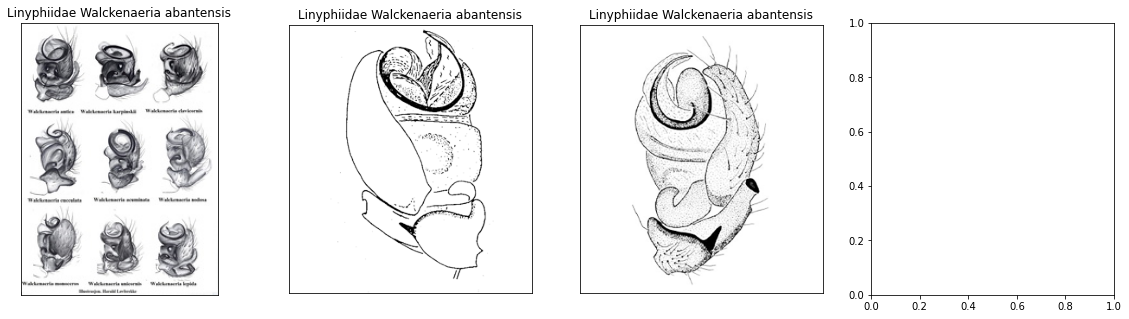

In [260]:
disp.plot_one(genus = 'Walckenaeria', species='Walckenaeria abantensis', content='pedipalp', site='both', ncols=4)

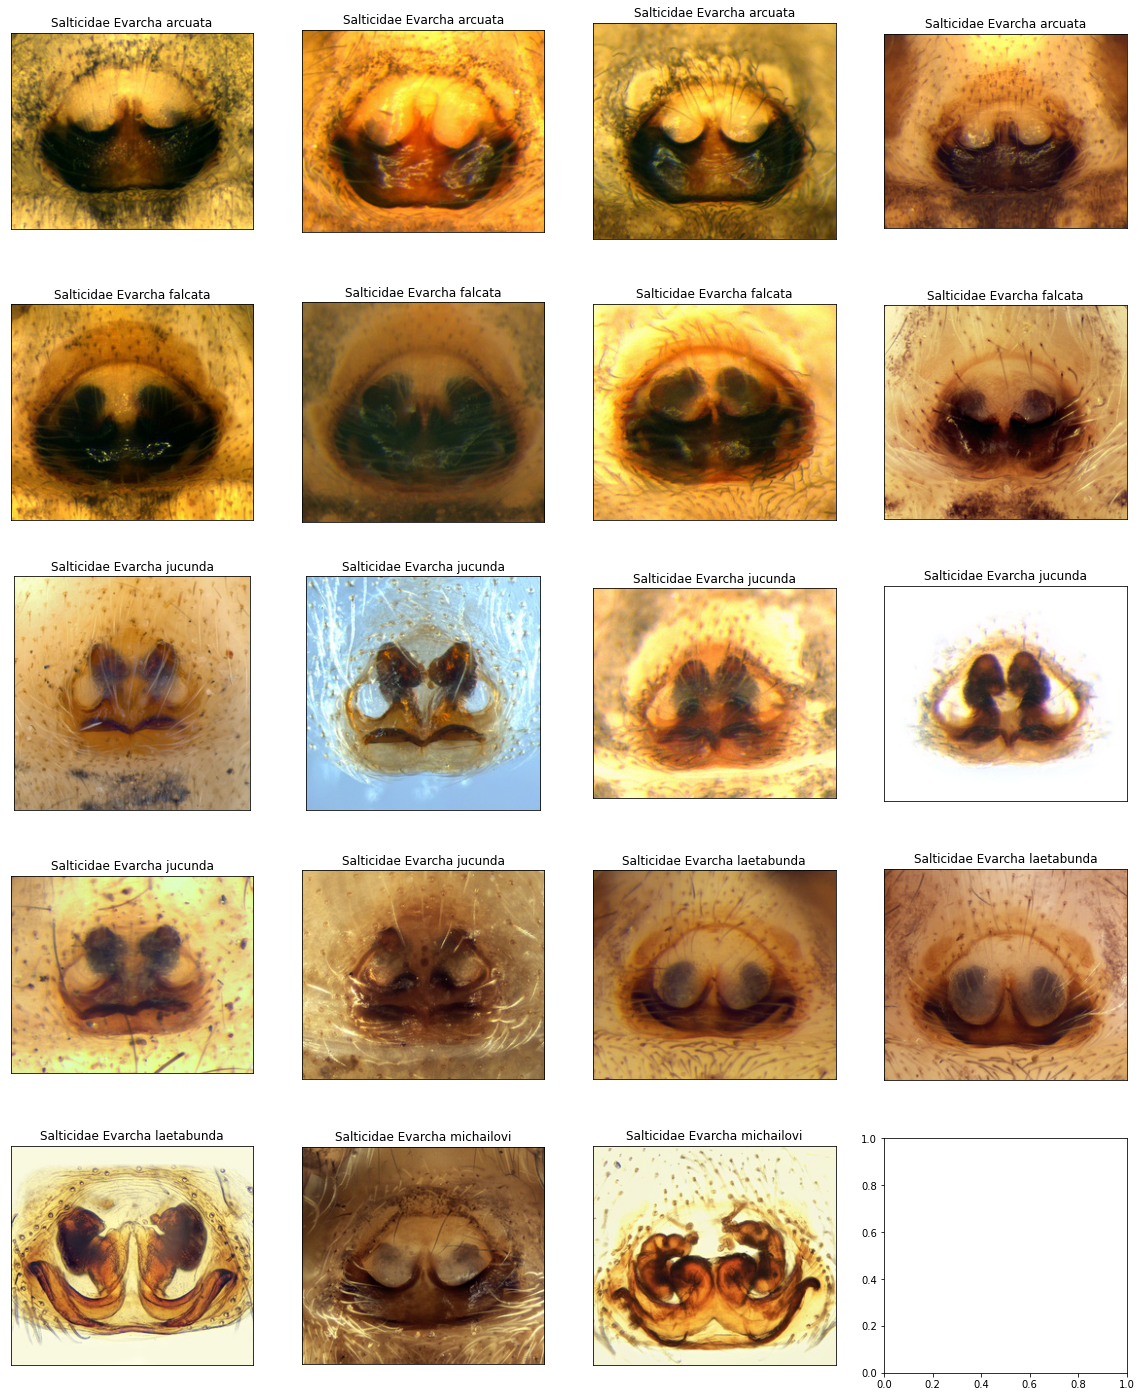

In [248]:
disp.plot_all(genus = 'Evarcha', content='epigyne', site='piwigo', ncols=4)